In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical, plot_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional,Dropout
import pydot
import graphviz

In [ ]:
df=pd.read_csv(r"goodreads_train.csv",usecols=['rating','review_text'])

In [ ]:
df.head()

,rating,review_text
0,5,This is a special book. It started slow for ab...
1,3,Recommended by Don Katz. Avail for free in Dec...
2,3,"A fun, fast paced science fiction thriller. I ..."
3,0,Recommended reading to understand what is goin...
4,4,"I really enjoyed this book, and there is a lot..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   rating       900000 non-null  int64 
 1   review_text  900000 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.7+ MB


In [ ]:
df.value_counts('rating')

rating
4    313688
5    265007
3    188972
2     72627
0     30988
1     28718
dtype: int64

In [ ]:
df.describe()

,rating
count,900000.000000
mean,3.689639
std,1.252583
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


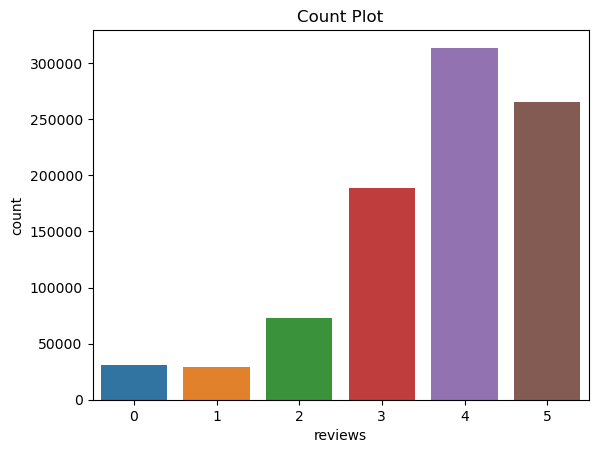

In [ ]:
sns.countplot(x=df['rating'])
plt.xlabel('reviews')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

As there is too much disparity in the count of each rating, we will be taking 20000 random  values from each rating and use it as training dataset

In [ ]:
train1=df.query('rating == 1').iloc[np.random.randint(0,df.query('rating == 1').value_counts('rating'),20000), :]
train2=df.query('rating == 2').iloc[np.random.randint(0,df.query('rating == 2').value_counts('rating'),20000), :]
train3=df.query('rating == 3').iloc[np.random.randint(0,df.query('rating == 3').value_counts('rating'),20000), :]
train4=df.query('rating == 4').iloc[np.random.randint(0,df.query('rating == 4').value_counts('rating'),20000), :]
train5=df.query('rating == 5').iloc[np.random.randint(0,df.query('rating == 5').value_counts('rating'),20000), :]

train_df=pd.concat([train1,train2,train3,train4,train5]).sample(frac=1)

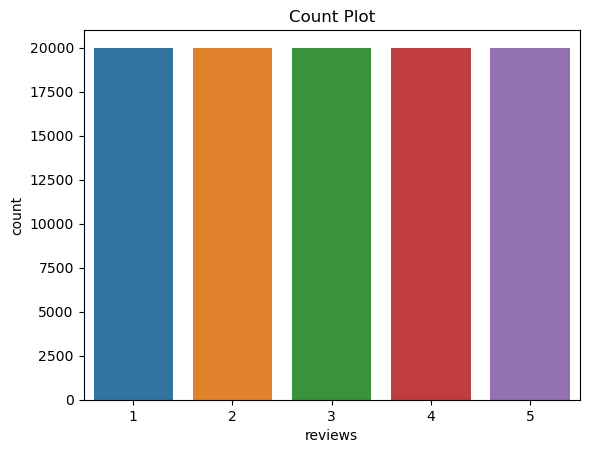

In [ ]:
sns.countplot(x=train_df['rating'])
plt.xlabel('reviews')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

In [ ]:
train_df

,rating,review_text
711366,3,"You know, once I actually took the time to rea..."
734164,4,"4.5 stars. Would probably have given it 5, but..."
516989,4,Trisha Wolfe has a talent for storytelling and...
466098,3,I re-read this for a genre study after listeni...
741219,2,I can't make it any further than page 114. I h...
...,...,...
808862,2,*I received a copy from NetGalley in exchange ...
146460,5,I loved Jane's story and her complicated relat...
69735,1,I started reading this to try to de-stress. I'...
685917,5,"Get ready for the ride of your life, because F..."


In [ ]:
contractions = { "ain't": "are not",
                "aren't": "are not",
                "can't": "cannot",
                "can't've": "cannot have",
                "'cause": "because",
                "could've": "could have",
                "couldn't": "could not",
                "couldn't've": "could not have",
                "didn't": "did not",
                "doesn't": "does not",
                "don't": "do not",
                "hadn't": "had not",
                "hadn't've": "had not have",
                "hasn't": "has not",
                "haven't": "have not",
                "he'd": "he had",
                "he'd've": "he would have",
                "he'll": "he will",
                "he'll've": "he will have",
                "he's": "he is",
                "how'd": "how did",
                "how'd'y": "how do you",
                "how'll": "how will",
                "how's": "how is",
                "I'd": "I would",
                "I'd've": "I would have",
                "I'll": "I will",
                "I'll've": "I will have",
                "I'm": "I am",
                "I've": "I have",
                "isn't": "is not",
                "it'd": "it had",
                "it'd've": "it would have",
                "it'll": "it will",
                "it'll've": "it will have",
                "it's": "it is",
                "let's": "let us",
                "ma'am": "madam",
                "mayn't": "may not",
                "might've": "might have",
                "mightn't": "might not",
                "mightn't've": "might not have",
                "must've": "must have",
                "mustn't": "must not",
                "mustn't've": "must not have",
                "needn't": "need not",
                "needn't've": "need not have",
                "o'clock": "of the clock",
                "oughtn't": "ought not",
                "oughtn't've": "ought not have",
                "shan't": "shall not",
                "sha'n't": "shall not",
                "shan't've": "shall not have",
                "she'd": "she would",
                "she'd've": "she would have",
                "she'll": "she will",
                "she'll've": "she will have",
                "she's": "she is",
                "should've": "should have",
                "shouldn't": "should not",
                "shouldn't've": "should not have",
                "so've": "so have",
                "so's": "so as",
                "that'd": "that would",
                "that'd've": "that would have",
                "that's": "that is",
                "there'd": "there would",
                "there'd've": "there would have",
                "there's": "there is",
                "they'd": "they would",
                "they'd've": "they would have",
                "they'll": "they will",
                "they'll've": "they will have",
                "they're": "they are",
                "they've": "they have",
                "to've": "to have",
                "wasn't": "was not",
                "we'd": "we would",
                "we'd've": "we would have",
                "we'll": "we will",
                "we'll've": "we will have",
                "we're": "we are",
                "we've": "we have",
                "weren't": "were not",
                "what'll": "what will",
                "what'll've": "what will have",
                "what're": "what are",
                "what's": "what is",
                "what've": "what have",
                "when's": "when is",
                "when've": "when have",
                "where'd": "where did",
                "where's": "where is",
                "where've": "where have",
                "who'll": "who will",
                "who'll've": "who will have",
                "who's": "who is",
                "who've": "who have",
                "why's": "why is",
                "why've": "why have",
                "will've": "will have",
                "won't": "will not",
                "won't've": "will not have",
                "would've": "would have",
                "wouldn't": "would not",
                "wouldn't've": "would not have",
                "y'all": "you all",
                "y'all'd": "you all would",
                "y'all'd've": "you all would have",
                "y'all're": "you all are",
                "y'all've": "you all have",
                "you'd": "you would",
                "you'd've": "you would have",
                "you'll": "you will",
                "you'll've": "you will have",
                "you're": "you are",
                "you've": "you have"
}
stopnltk=nltk.corpus.stopwords.words('english')
stopnltk.remove('not')
stopnltk.remove('no')

In [ ]:
def cleanse_text(data, column='review_text'):

    #start with converting every word in each column to lowercase
    data[column]=data[column].apply(lambda x: x.lower())

    #next, replacing contractions with their full forms
    data['review_text']=data['review_text'].apply(lambda x: ' '.join([contractions.get(word,word) for word in x.split()]))

    #removing punctuations
    data['review_text']=data['review_text'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

    #removing all "spoiler alert" tags
    data['review_text']=data['review_text'].str.replace('spoiler alert','')

    #removing all numeric characters
    data['review_text']=data['review_text'].str.translate(str.maketrans("","",string.digits))

    #removing all the stopwords
    data['review_text']=data['review_text'].apply(lambda x: " ".join([i for i in x.split() if i not in stopnltk]))

    #lemmatization
    data['review_text']=data['review_text'].apply(lambda x: " ".join([Word(i).lemmatize() for i in x.split()]))

    return data

In [ ]:
train_df

,rating,review_text
711366,3,"You know, once I actually took the time to rea..."
734164,4,"4.5 stars. Would probably have given it 5, but..."
516989,4,Trisha Wolfe has a talent for storytelling and...
466098,3,I re-read this for a genre study after listeni...
741219,2,I can't make it any further than page 114. I h...
...,...,...
808862,2,*I received a copy from NetGalley in exchange ...
146460,5,I loved Jane's story and her complicated relat...
69735,1,I started reading this to try to de-stress. I'...
685917,5,"Get ready for the ride of your life, because F..."


In [ ]:
train_df=cleanse_text(train_df)

In [ ]:
comment_words2=""
for rev in train_df['review_text']:
    tokens2=rev.split()
    for i in range(len(tokens2)):
        tokens2[i]=tokens2[i].lower()
    comment_words2 += " ".join(tokens2)+" "

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,background_color ='black',stopwords = STOPWORDS,
                      min_font_size = 10).generate(comment_words2)

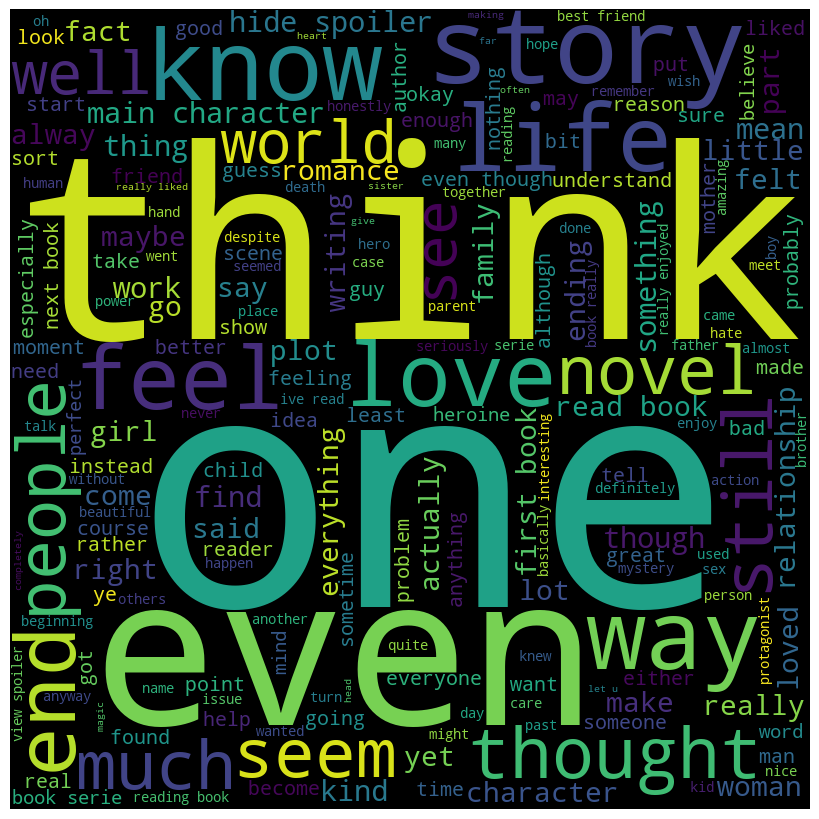

In [ ]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
x=train_df.review_text
y=to_categorical(train_df.rating-1)

In [ ]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x)
x=tokenizer.texts_to_sequences(x)
lengths=[len(seq) for seq in x]

In [ ]:
x=pad_sequences(x,maxlen=int(np.percentile(lengths,90)))

In [ ]:
print(x)
print(y)
print(x.shape,y.shape)

[[   0    0    0 ...   54 1454  384]
 [   0    0    0 ... 2678 4046  695]
 [   0    0 1364 ...    9  283    7]
 ...
 [   0    0    0 ...  993  374  381]
 [   0    0    0 ...  675  289   49]
 [   0    0    0 ...    2    8 3116]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]
(100000, 216) (100000, 5)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.60)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40000, 216)
(40000, 5)
(60000, 216)
(60000, 5)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000,output_dim=128,input_length=x_train.shape[1]))
model.add(Bidirectional(LSTM(32,dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy','mse','mae'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 216, 128)          640000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               41216     
 l)                                                              
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 681,541
Trainable params: 681,541
Non-trainable params: 0
_________________________________________________________________
None


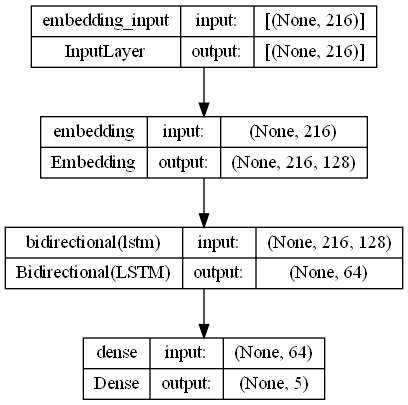

In [ ]:
plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
1250/1250 [==============================] - 387s 303ms/step - loss: 1.2486 - accuracy: 0.4470 - mse: 0.1311 - mae: 0.2630
Epoch 2/5
1250/1250 [==============================] - 242s 194ms/step - loss: 1.0837 - accuracy: 0.5347 - mse: 0.1167 - mae: 0.2338
Epoch 3/5
1250/1250 [==============================] - 252s 201ms/step - loss: 1.0085 - accuracy: 0.5747 - mse: 0.1092 - mae: 0.2196
Epoch 4/5
1250/1250 [==============================] - 254s 203ms/step - loss: 0.9454 - accuracy: 0.6068 - mse: 0.1027 - mae: 0.2072
Epoch 5/5
1250/1250 [==============================] - 260s 208ms/step - loss: 0.8839 - accuracy: 0.6370 - mse: 0.0959 - mae: 0.1942


In [ ]:
scores=model.evaluate(x_test,y_test,verbose=1)

1787/1875 [===========================>..] - ETA: 2s - loss: 1.2147 - accuracy: 0.4970 - mse: 0.1279 - mae: 0.2306

In [ ]:
scores